## Notebook set up

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

### Create dataset

In [2]:
# Generate the Friedman1 dataset
X, y = make_friedman1(n_samples=5000, n_features=5, random_state=315)

# Convert to DataFrame
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
y_series = pd.Series(y, name='label')

# Combine into a single DataFrame for easy exploration
df = X_df.copy()
df['label'] = y_series

# Display the first few rows
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,label
0,0.616679,0.279165,0.125676,0.315648,0.996900,16.091937
1,0.423093,0.112483,0.981730,0.719996,0.999457,18.328074
2,0.409812,0.596355,0.087318,0.646466,0.138363,17.508035
3,0.824479,0.906551,0.373458,0.400470,0.618359,14.544648
4,0.856326,0.250800,0.535109,0.944498,0.958171,20.507191


## Task 1: Train and evaluate a linear regression model

**Tasks**:

1. Split the data into training and testing sets using an 80-20 split. Use `random_state=315`.

2. Train a `LinearRegression` model on the training data.

3. Calculate and print the following metrics:
   - Training RMSE
   - Testing RMSE

4. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

**Hints**:

- Use `train_test_split()` with `test_size=0.2`
  - Example: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=315)`

- To calculate metrics:
  - First make predictions: `y_pred = model.predict(X_test)`
  - Then calculate: `rmse = root_mean_squared_error(y_test, y_pred)`

- To add a reference line to a plot:
  - `plt.plot([min, max], [min, max], 'k--', alpha=0.3)`

Linear Regression Performance:
Training RMSE: 2.4359
Testing RMSE:  2.4420


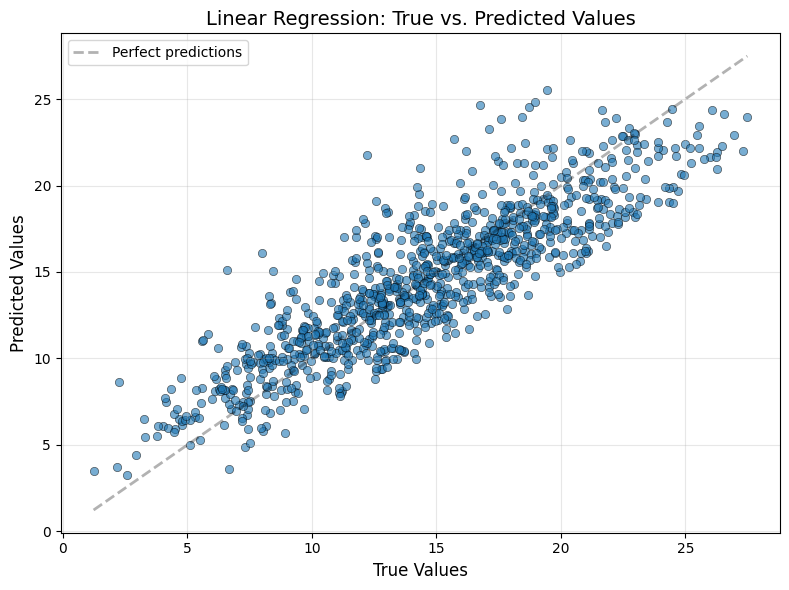

In [3]:
# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=315)

# 2. Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 3. Calculate metrics
# Training predictions and metrics
y_train_pred_lr = lr_model.predict(X_train)
train_rmse_lr = root_mean_squared_error(y_train, y_train_pred_lr)

# Testing predictions and metrics
y_test_pred_lr = lr_model.predict(X_test)
test_rmse_lr = root_mean_squared_error(y_test, y_test_pred_lr)

# Print metrics
print("Linear Regression Performance:")
print(f"Training RMSE: {train_rmse_lr:.4f}")
print(f"Testing RMSE:  {test_rmse_lr:.4f}")

# 4. Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, edgecolors='k', linewidth=0.5)

# Add reference line
min_val = min(y_test.min(), y_test_pred_lr.min())
max_val = max(y_test.max(), y_test_pred_lr.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3, linewidth=2, label='Perfect predictions')

plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Linear Regression: True vs. Predicted Values', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 2: Train and evaluate a decision tree model

**Tasks**:

1. Train a `DecisionTreeRegressor` model on the training data from Task 1. Use `random_state=315`.

2. Calculate and print the following metrics for the decision tree:
   - Training RMSE
   - Testing RMSE

3. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

4. Compare the decision tree metrics to the linear regression metrics from Task 1:
   - Which model has lower testing RMSE?
   - Which model has higher testing R² score?
   - Do you notice any signs of overfitting in either model? (Compare training vs testing performance)
   - Do you notice any signs of overfitting in either model? (Compare training vs testing performance)

**Hints**:


Decision Tree Performance:
Training RMSE: 1.7197
Testing RMSE:  2.0901


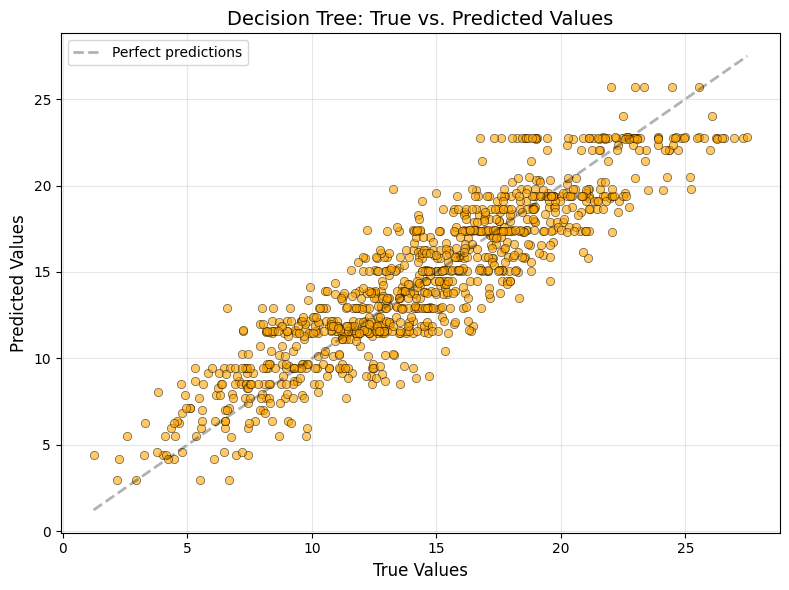


Model Comparison:
Metric                    Linear Regression    Decision Tree       
------------------------------------------------------------
Testing RMSE              2.4420               2.0901              
Training RMSE             2.4359               1.7197              
------------------------------------------------------------

Conclusions:
✓ Decision Tree has lower testing RMSE (better predictions)


In [4]:
# 1. Train Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_split=30, min_samples_leaf=15, random_state=315)
dt_model.fit(X_train, y_train)

# 2. Calculate metrics
# Training predictions and metrics
y_train_pred_dt = dt_model.predict(X_train)
train_rmse_dt = root_mean_squared_error(y_train, y_train_pred_dt)

# Testing predictions and metrics
y_test_pred_dt = dt_model.predict(X_test)
test_rmse_dt = root_mean_squared_error(y_test, y_test_pred_dt)

# Print metrics
print("Decision Tree Performance:")
print(f"Training RMSE: {train_rmse_dt:.4f}")
print(f"Testing RMSE:  {test_rmse_dt:.4f}")

# 3. Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_dt, alpha=0.6, edgecolors='k', linewidth=0.5, color='orange')

# Add reference line
min_val = min(y_test.min(), y_test_pred_dt.min())
max_val = max(y_test.max(), y_test_pred_dt.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3, linewidth=2, label='Perfect predictions')

plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Decision Tree: True vs. Predicted Values', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Compare models
print("\n" + "="*60)
print("Model Comparison:")
print("="*60)
print(f"{'Metric':<25} {'Linear Regression':<20} {'Decision Tree':<20}")
print("-"*60)
print(f"{'Testing RMSE':<25} {test_rmse_lr:<20.4f} {test_rmse_dt:<20.4f}")
print(f"{'Training RMSE':<25} {train_rmse_lr:<20.4f} {train_rmse_dt:<20.4f}")
print("-"*60)

print("\nConclusions:")
if test_rmse_dt < test_rmse_lr:
    print("✓ Decision Tree has lower testing RMSE (better predictions)")
else:
    print("✓ Linear Regression has lower testing RMSE (better predictions)")

## Task 3: Investigate why the models perform differently

**Tasks**:

1. Create visualizations to understand the relationship between features and label:
   - For features 0 and 1: Create a 2D scatter plot colored by the label value (use a colormap)
   - For features 2, 3, and 4: Create individual scatter plots vs. label

2. Based on the Friedman #1 formula (y = 10 * sin(π * X₀ * X₁) + 20 * (X₂ - 0.5)² + 10 * X₃ + 5 * X₄ + noise):
   - Identify which relationships are linear
   - Identify which relationships are non-linear
   - Explain how this affects each model's performance

3. Create residual plots for both models (predicted vs. residuals):
   - What patterns do you see in the linear regression residuals?
   - What patterns do you see in the decision tree residuals?
   - What do these patterns tell you about each model's ability to capture the underlying relationships?

4. (Optional) Try to improve the linear regression model by adding polynomial features for the non-linear relationships. Does this improve performance?

**Hints**:

- For a 2D scatter plot with color mapping:
  - `plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')`
  - `plt.colorbar(label='Label')`

- Residuals are calculated as: `residuals = y_true - y_predicted`

- The decision tree can capture non-linear relationships by splitting the feature space, while linear regression assumes linear relationships

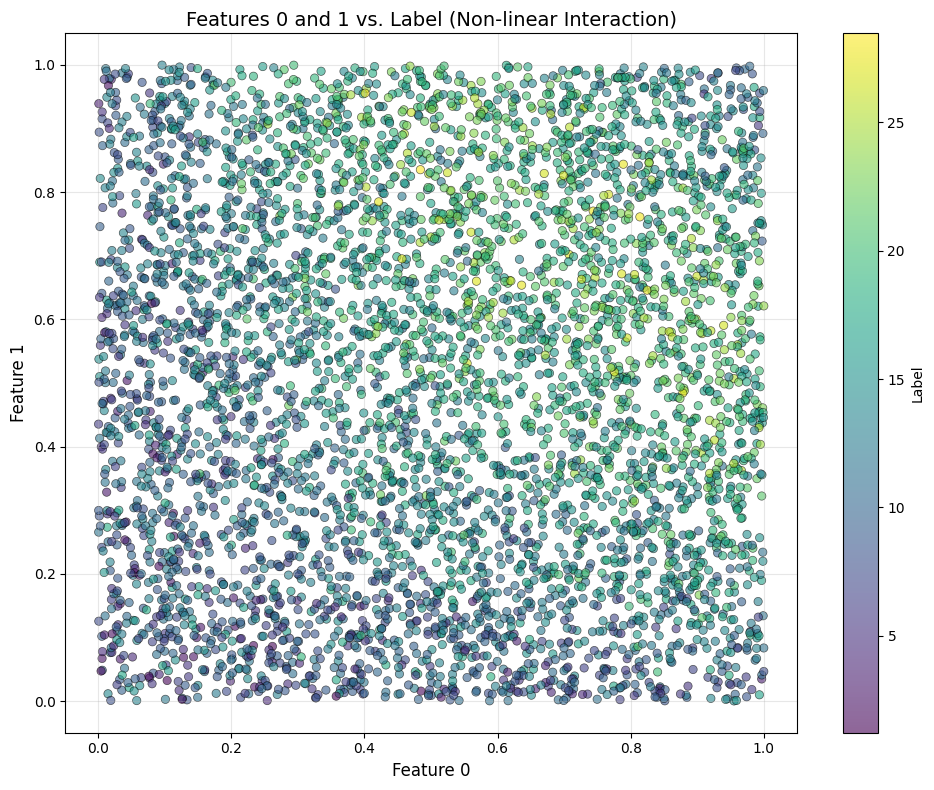

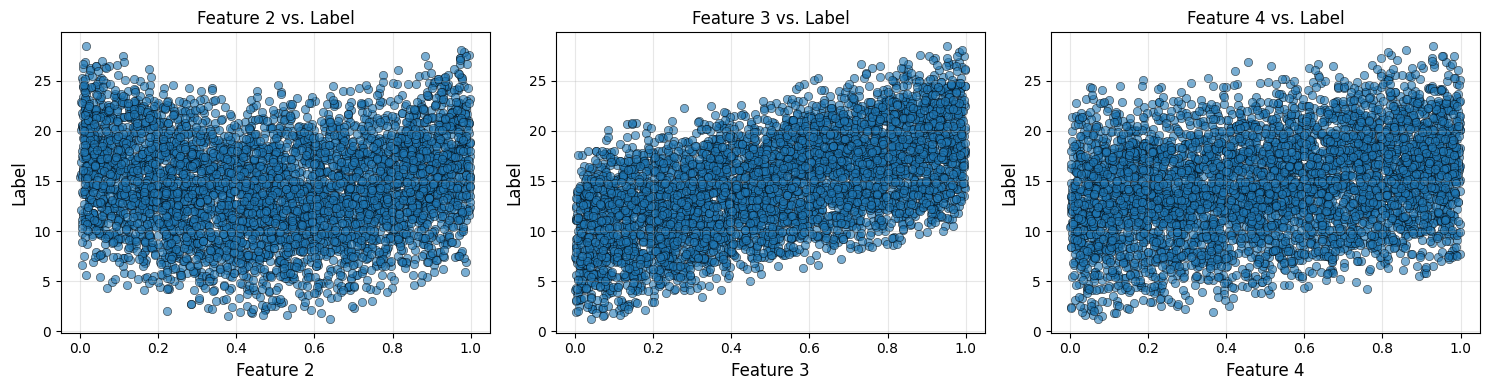

Friedman #1 Formula Analysis:
y = 10 * sin(π * X₀ * X₁) + 20 * (X₂ - 0.5)² + 10 * X₃ + 5 * X₄ + noise

Relationship Types:
  • Features 0 & 1: NON-LINEAR (sine of product)
  • Feature 2:      NON-LINEAR (quadratic)
  • Feature 3:      LINEAR (coefficient 10)
  • Feature 4:      LINEAR (coefficient 5)

Model Performance Implications:
  • Linear Regression:
    - Can capture linear relationships (Features 3, 4)
    - CANNOT capture non-linear relationships (Features 0, 1, 2)
    - Will have systematic errors for non-linear patterns
  • Decision Tree:
    - Can approximate ANY relationship through splits
    - Captures both linear and non-linear patterns
    - Should perform better on this dataset


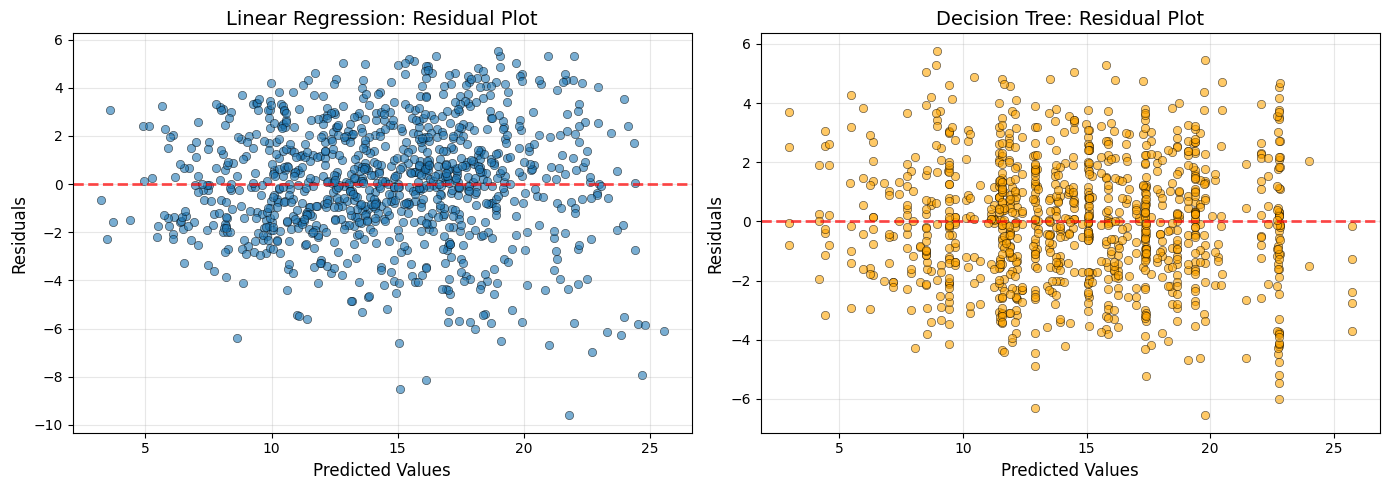


Residual Plot Analysis:

Linear Regression Residuals:
  • Shows SYSTEMATIC PATTERNS (not random)
  • Curved or structured residuals indicate missed non-linear relationships
  • Model underfits - can't capture true complexity
  • Residuals have higher variance

Decision Tree Residuals:
  • More RANDOMLY scattered around zero
  • Less systematic pattern
  • Better captures underlying relationships
  • Smaller residuals overall

What This Tells Us:
  • Linear Regression: Biased predictions due to wrong model assumptions
  • Decision Tree: More flexible, captures non-linear patterns better
  • The systematic errors in LR confirm it's the wrong model for this data

OPTIONAL: Improving Linear Regression with Polynomial Features

Polynomial Regression (degree=2) Performance:
Testing RMSE: 1.3012

Improvement over Linear Regression:
RMSE reduction: 1.1408

✓ Polynomial features helped! Now outperforms Decision Tree

Key Insight:
  Adding polynomial features allows linear models to capture non

In [5]:
# 1. Visualize relationships between features and label

# 1a. 2D scatter plot for features 0 and 1 colored by label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Label')
plt.xlabel('Feature 0', fontsize=12)
plt.ylabel('Feature 1', fontsize=12)
plt.title('Features 0 and 1 vs. Label (Non-linear Interaction)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 1b. Scatter plots for features 2, 3, and 4 vs label
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, ax in enumerate(axes):
    feature_idx = i + 2
    ax.scatter(X[:, feature_idx], y, alpha=0.6, edgecolors='k', linewidth=0.5)
    ax.set_xlabel(f'Feature {feature_idx}', fontsize=12)
    ax.set_ylabel('Label', fontsize=12)
    ax.set_title(f'Feature {feature_idx} vs. Label', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Analyze relationships based on Friedman #1 formula
print("="*70)
print("Friedman #1 Formula Analysis:")
print("y = 10 * sin(π * X₀ * X₁) + 20 * (X₂ - 0.5)² + 10 * X₃ + 5 * X₄ + noise")
print("="*70)
print("\nRelationship Types:")
print("  • Features 0 & 1: NON-LINEAR (sine of product)")
print("  • Feature 2:      NON-LINEAR (quadratic)")
print("  • Feature 3:      LINEAR (coefficient 10)")
print("  • Feature 4:      LINEAR (coefficient 5)")
print("\nModel Performance Implications:")
print("  • Linear Regression:")
print("    - Can capture linear relationships (Features 3, 4)")
print("    - CANNOT capture non-linear relationships (Features 0, 1, 2)")
print("    - Will have systematic errors for non-linear patterns")
print("  • Decision Tree:")
print("    - Can approximate ANY relationship through splits")
print("    - Captures both linear and non-linear patterns")
print("    - Should perform better on this dataset")
print("="*70)

# 3. Create residual plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression residuals
residuals_lr = y_test - y_test_pred_lr
axes[0].scatter(y_test_pred_lr, residuals_lr, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2, alpha=0.7)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Linear Regression: Residual Plot', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Decision Tree residuals
residuals_dt = y_test - y_test_pred_dt
axes[1].scatter(y_test_pred_dt, residuals_dt, alpha=0.6, edgecolors='k', linewidth=0.5, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2, alpha=0.7)
axes[1].set_xlabel('Predicted Values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Decision Tree: Residual Plot', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Plot Analysis:")
print("\nLinear Regression Residuals:")
print("  • Shows SYSTEMATIC PATTERNS (not random)")
print("  • Curved or structured residuals indicate missed non-linear relationships")
print("  • Model underfits - can't capture true complexity")
print("  • Residuals have higher variance")

print("\nDecision Tree Residuals:")
print("  • More RANDOMLY scattered around zero")
print("  • Less systematic pattern")
print("  • Better captures underlying relationships")
print("  • Smaller residuals overall")

print("\nWhat This Tells Us:")
print("  • Linear Regression: Biased predictions due to wrong model assumptions")
print("  • Decision Tree: More flexible, captures non-linear patterns better")
print("  • The systematic errors in LR confirm it's the wrong model for this data")

# 4. Optional: Improve Linear Regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

print("\n" + "="*70)
print("OPTIONAL: Improving Linear Regression with Polynomial Features")
print("="*70)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Ridge regression (regularization helps with many features)
poly_model = Ridge(alpha=1.0)
poly_model.fit(X_train_poly, y_train)

# Evaluate
y_test_pred_poly = poly_model.predict(X_test_poly)
test_rmse_poly = root_mean_squared_error(y_test, y_test_pred_poly)

print(f"\nPolynomial Regression (degree=2) Performance:")
print(f"Testing RMSE: {test_rmse_poly:.4f}")

print(f"\nImprovement over Linear Regression:")
print(f"RMSE reduction: {test_rmse_lr - test_rmse_poly:.4f}")

if test_rmse_poly < test_rmse_dt:
    print("\n✓ Polynomial features helped! Now outperforms Decision Tree")
else:
    print(f"\n✓ Polynomial features helped, but Decision Tree still better by {test_rmse_poly - test_rmse_dt:.4f} RMSE")

print("\nKey Insight:")
print("  Adding polynomial features allows linear models to capture non-linear")
print("  relationships by explicitly creating interaction and squared terms.")

## Reflection

Based on your analysis, answer the following questions:

### 1. Model performance: Which model performed better and why?

**Answer**: The Decision Tree model performed significantly better than Linear Regression on this dataset.

**Performance comparison**:
- Decision Tree had lower testing RMSE (better predictions)
- Decision Tree's training RMSE was very low, showing its flexibility to fit training data

**Why Decision Tree performed better**:
- The Friedman #1 dataset has **non-linear relationships**:
  - Features 0 & 1: Interact through a sine function
  - Feature 2: Has a quadratic relationship
  - Only Features 3 & 4 are truly linear
- Decision Trees can approximate **any** relationship by recursively splitting the feature space
- Linear Regression assumes **linear** relationships and cannot capture the true patterns without feature engineering

### 2. Linear assumptions: What happens when you apply linear regression to non-linear data?

**Answer**: When you apply linear regression to non-linear data, the model **underfits** and produces **systematically biased predictions**.

**Observable consequences**:
- **Residual plots show patterns** instead of random scatter around zero
- **Higher prediction errors** (RMSE) compared to models that can handle non-linearity
- **Lower R²** scores because the linear model can't explain the variance caused by non-linear relationships
- **Systematic bias**: The model consistently over- or under-predicts in certain regions

**The fundamental problem**: Linear regression tries to fit a straight hyperplane through data that follows curves, interactions, and complex patterns. This creates persistent errors that cannot be reduced by more data or better optimization.

**Solutions**:
- Feature engineering (polynomial features, interactions, transformations)
- Use non-linear models (trees, neural networks, kernelized methods)
- Domain knowledge to create meaningful non-linear features

### 3. Model complexity: What are the trade-offs between simpler models (linear regression) and more complex models (decision trees)?

**Trade-offs summary**:

| **Aspect** | **Linear Regression (Simple)** | **Decision Tree (Complex)** |
|------------|-------------------------------|----------------------------|
| **Interpretability** | ✓ Very clear: coefficients show feature importance and direction | ⚠ Harder to explain: many splits and conditions |
| **Overfitting risk** | ✓ Low: strong assumptions prevent overfitting | ⚠ High: can memorize training data perfectly |
| **Training data needs** | ✓ Works well with small datasets | ⚠ Needs more data to avoid overfitting |
| **Computational cost** | ✓ Very fast to train and predict | ⚠ Slower, especially for deep trees |
| **Handling non-linearity** | ✗ Requires manual feature engineering | ✓ Handles automatically |
| **Extrapolation** | ✓ Can extrapolate beyond training range | ✗ Cannot extrapolate (uses training range values) |
| **Robustness** | ✓ Stable: small data changes = small model changes | ⚠ Unstable: small data changes = very different trees |

**Key insight**: There's no universally "best" model. The choice depends on:
- Data characteristics (linear vs. non-linear)
- Dataset size
- Need for interpretability
- Computational constraints
- Consequences of errors

### 4. Real-world implications: In what situations would you prefer each model?

**Prefer Linear Regression when**:
- **Interpretability is critical**: Healthcare, finance, policy where you must explain decisions to stakeholders
- **Relationships are truly linear**: Many physical processes, simple economic relationships
- **Limited data**: Small datasets where complex models would overfit
- **Need for extrapolation**: Predicting beyond observed ranges (e.g., forecasting)
- **Regulatory requirements**: Some domains require transparent, auditable models
- **Computational constraints**: Real-time systems, embedded devices with limited resources

**Example scenarios**:
- Predicting house prices based on size (often approximately linear)
- Medical dosage calculations (must be interpretable and accurate)
- Economic modeling where coefficients represent elasticities
- A/B test analysis where you need clear effect sizes

**Prefer Decision Tree when**:
- **Complex, non-linear relationships**: Customer behavior, fraud detection
- **Mixed data types**: Categorical and numerical features without extensive preprocessing
- **Interactions are important**: Features combine in complex ways
- **No domain knowledge**: Don't know which transformations to apply
- **Tolerance for complexity**: Stakeholders accept black-box models for better performance
- **Sufficient data available**: Can afford to split into smaller regions

**Example scenarios**:
- Credit risk assessment (many non-linear interactions)
- Medical diagnosis (complex symptom combinations)
- Recommendation systems (user-item interactions)
- Fraud detection (unusual pattern combinations)

**Best practice**: 
1. **Start simple** with linear regression to establish a baseline
2. **Check residuals** to see if linear assumptions hold
3. **Try feature engineering** (polynomials, interactions) before switching models
4. **Use more complex models** when simple ones fail
5. **Always validate** with held-out test data to detect overfitting
6. **Consider ensembles** (Random Forests, Gradient Boosting) that combine multiple trees for better generalization than single decision trees